In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
df = pd.read_csv("DS2010_NBA_DATA_ANALYSIS.csv")

In [3]:
def adjusted_r2(r2):
    return 1 - (1 - r2) * ( (df.shape[0] - 1) / (df.shape[0] - df.shape[1] - 1) )

In [4]:
#x = df[["FG", "FGA", "3P", "3PA", "FT", "FTA", "FG%", "3P%", "FT%", "Pace", "ORtg"]]
x = df[["FG", "FGA", "FT", "FTA", "FG%", "FT%"]]
y = df["PTS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_score = lr.score(x_test, y_test)
print(lr_score)
print(adjusted_r2(lr_score))

print("-" * 50)

ridge = RidgeCV()
ridge.fit(x_train, y_train)
ridge_score = ridge.score(x_test, y_test)
print(ridge_score)
print(adjusted_r2(ridge_score))

print("-" * 50)

lasso = LassoCV()
lasso.fit(x_train, y_train)
lasso_score = lasso.score(x_test, y_test)
print(lasso_score)
print(adjusted_r2(lasso_score))

0.9844929037197097
0.9793238716262795
--------------------------------------------------
0.9570522858507116
0.942736381134282
--------------------------------------------------
0.9590723455818762
0.9454297941091682


/Users/daviddechantsreiter/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


In [5]:
df_clean = pd.read_csv("DS2010_NBA_DATA_ANALYSIS.csv")
df_clean = df_clean.iloc[35:]

In [6]:
x = df_clean[["FG", "FGA", "3P", "3PA", "FT", "FTA", "FG%", "3P%", "FT%", "Pace", "ORtg"]]
#x = df[["FG", "FGA", "FT", "FTA", "FG%", "FT%"]]
y = df_clean["PTS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_score = lr.score(x_test, y_test)
print(lr_score)
print(adjusted_r2(lr_score))

print("-" * 50)

ridge = RidgeCV()
ridge.fit(x_train, y_train)
ridge_score = ridge.score(x_test, y_test)
print(ridge_score)
print(adjusted_r2(ridge_score))

print("-" * 50)

lasso = LassoCV()
lasso.fit(x_train, y_train)
lasso_score = lasso.score(x_test, y_test)
print(lasso_score)
print(adjusted_r2(lasso_score))

0.9999672551002982
0.9999563401337309
--------------------------------------------------
0.9999406537291279
0.9999208716388371
--------------------------------------------------
0.9998465969946946
0.9997954626595927


/Users/daviddechantsreiter/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e-01, tolerance: 1.201e-01
  model = cd_fast.enet_coordinate_descent(


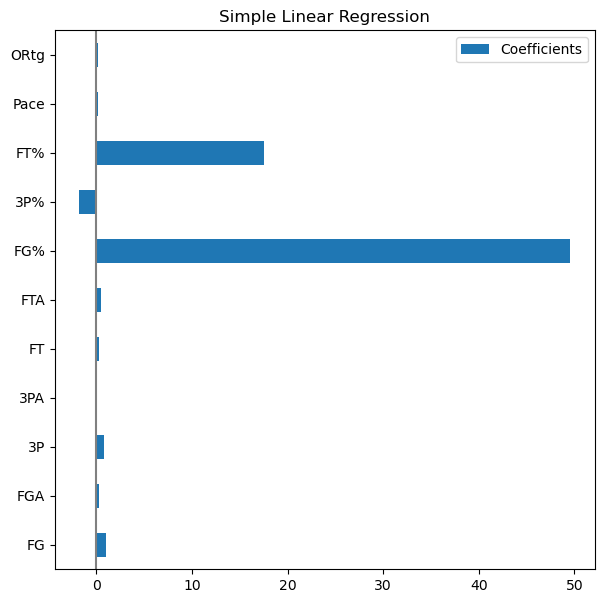

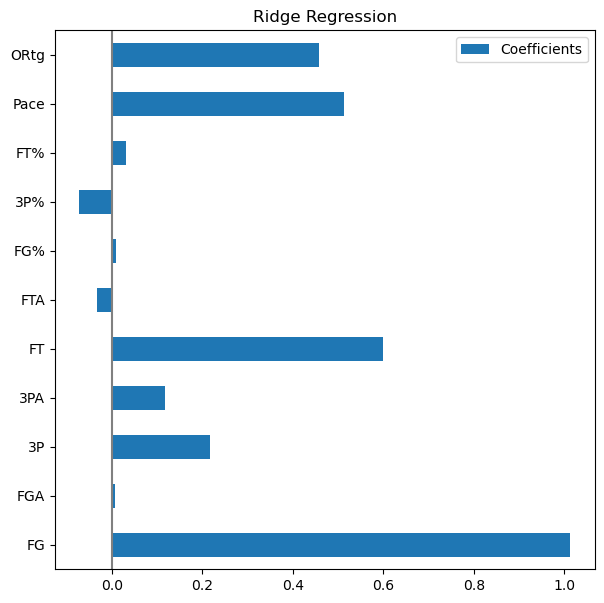

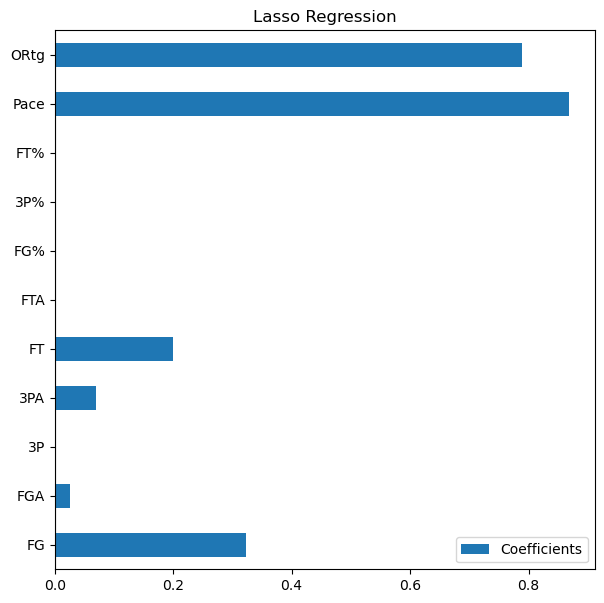

In [7]:
lr_coefs = pd.DataFrame(
    lr.coef_, columns=["Coefficients"], index=x_train.columns
)

lr_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Simple Linear Regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

ridge_coefs = pd.DataFrame(
    ridge.coef_, columns=["Coefficients"], index=x_train.columns
)

ridge_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge Regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

lasso_coefs = pd.DataFrame(
    lasso.coef_, columns=["Coefficients"], index=x_train.columns
)

lasso_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso Regression")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

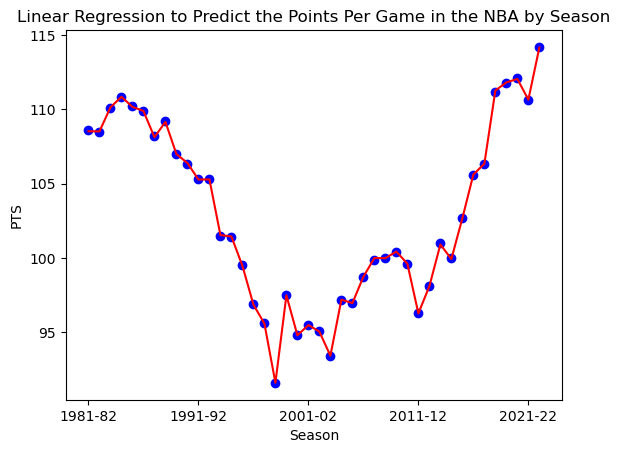

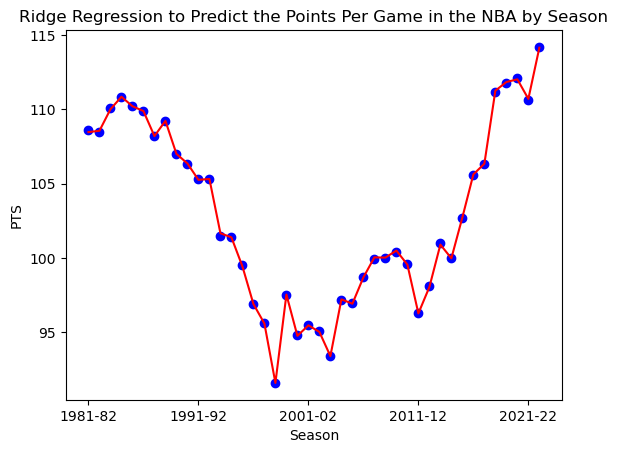

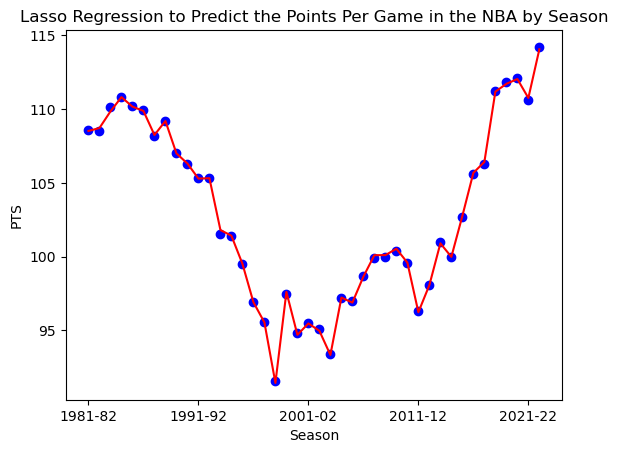

In [8]:
lr_pred = lr.predict(x)
plt.scatter(df_clean["Season"], df_clean["PTS"], color="b")
plt.plot(lr_pred, color="r")
plt.title("Linear Regression to Predict the Points Per Game in the NBA by Season")
plt.ylabel("PTS")
plt.xlabel("Season")
selected_ticks = np.arange(0, len(df_clean["Season"]), step=10)
plt.xticks(selected_ticks, [df_clean["Season"].iloc[tick] for tick in selected_ticks])
plt.show()

ridge_pred = ridge.predict(x)
plt.scatter(df_clean["Season"], df_clean["PTS"], color="b")
plt.plot(ridge_pred, color="r")
plt.title("Ridge Regression to Predict the Points Per Game in the NBA by Season")
plt.ylabel("PTS")
plt.xlabel("Season")
selected_ticks = np.arange(0, len(df_clean["Season"]), step=10)
plt.xticks(selected_ticks, [df_clean["Season"].iloc[tick] for tick in selected_ticks])
plt.show()

lasso_pred = lasso.predict(x)
plt.scatter(df_clean["Season"], df_clean["PTS"], color="b")
plt.plot(lasso_pred, color="r")
plt.title("Lasso Regression to Predict the Points Per Game in the NBA by Season")
plt.ylabel("PTS")
plt.xlabel("Season")
selected_ticks = np.arange(0, len(df_clean["Season"]), step=10)
plt.xticks(selected_ticks, [df_clean["Season"].iloc[tick] for tick in selected_ticks])
plt.show()

0.7767067095777459


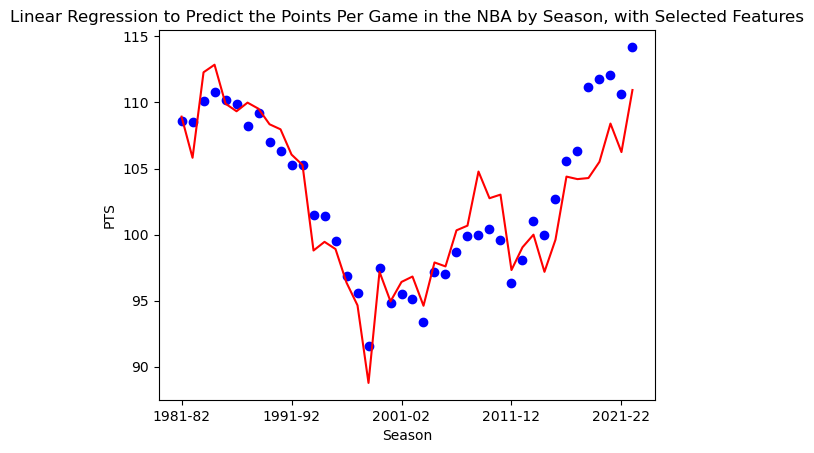

0.9243537439548697


/Users/daviddechantsreiter/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


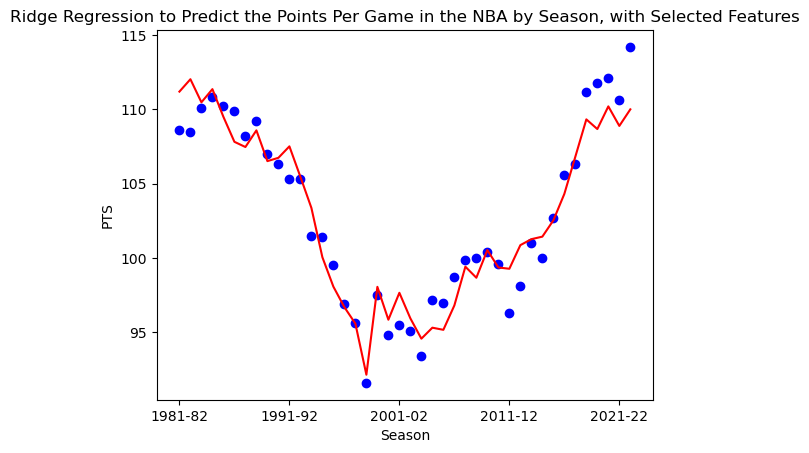

0.9994888281356984


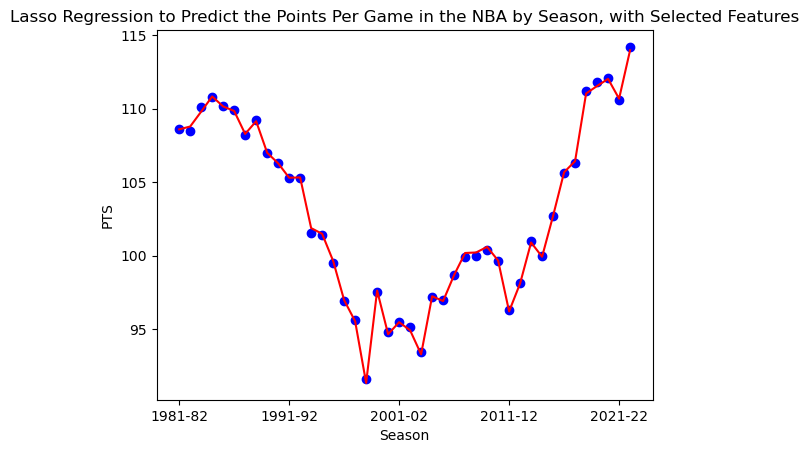

In [9]:
x_selected = x_train[["FG%", "FT%"]]

lr_selected = LinearRegression()
lr_selected.fit(x_selected, y_train)
print(lr_selected.score(x_test[["FG%", "FT%"]], y_test))

y_pred = lr_selected.predict(x[["FG%", "FT%"]])

plt.scatter(df_clean["Season"], df_clean["PTS"], label='Data Points', color="b")
plt.plot(y_pred, c='red', label='Regression line')
plt.title("Linear Regression to Predict the Points Per Game in the NBA by Season, with Selected Features")
plt.ylabel("PTS")
plt.xlabel("Season")
selected_ticks = np.arange(0, len(df_clean["Season"]), step=10)
plt.xticks(selected_ticks, [df_clean["Season"].iloc[tick] for tick in selected_ticks])
plt.show()

x_selected = x_train[["FG", "FT"]]

ridge_selected = RidgeCV()
ridge_selected.fit(x_selected, y_train)
print(ridge_selected.score(x_test[["FG", "FT"]], y_test))

y_pred = ridge_selected.predict(x[["FG", "FT"]])

plt.scatter(df_clean["Season"], df_clean["PTS"], label='Data Points', color="b")
plt.plot(y_pred, c='red', label='Regression line')
plt.title("Ridge Regression to Predict the Points Per Game in the NBA by Season, with Selected Features")
plt.ylabel("PTS")
plt.xlabel("Season")
selected_ticks = np.arange(0, len(df_clean["Season"]), step=10)
plt.xticks(selected_ticks, [df_clean["Season"].iloc[tick] for tick in selected_ticks])
plt.show()

x_selected = x_train[["ORtg", "Pace"]]

lasso_selected = LassoCV()
lasso_selected.fit(x_selected, y_train)
print(lasso_selected.score(x_test[["ORtg", "Pace"]], y_test))

y_pred = lasso_selected.predict(x[["ORtg", "Pace"]])

plt.scatter(df_clean["Season"], df_clean["PTS"], label='Data Points', color="b")
plt.plot(y_pred, c='red', label='Regression line')
plt.title("Lasso Regression to Predict the Points Per Game in the NBA by Season, with Selected Features")
plt.ylabel("PTS")
plt.xlabel("Season")
selected_ticks = np.arange(0, len(df_clean["Season"]), step=10)
plt.xticks(selected_ticks, [df_clean["Season"].iloc[tick] for tick in selected_ticks])
plt.show()